In [112]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('dark_background')

---
**Finding Invertion in inflation dataset**

In [113]:
country='BFA'
df = pd.read_csv('../data/infaltion.csv')
df = df[df.iloc[:,1]==country]
# df = df[df.iloc[:,1]=='IND']
df_data = df

Text(0, 0.5, 'price')

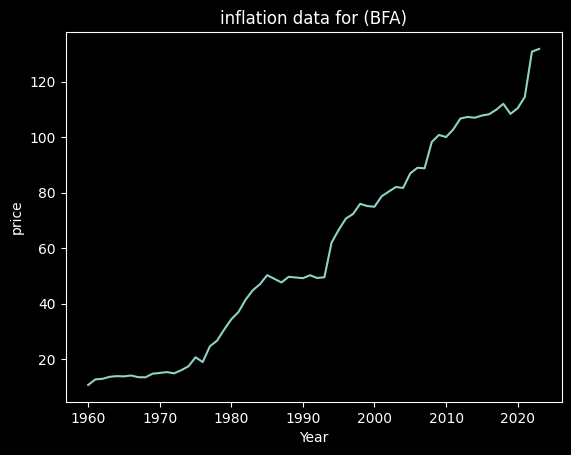

In [114]:
plt.plot(df.iloc[:100,2],df.iloc[:100,-1])
plt.title(f'inflation data for ({country})')
plt.xlabel(f'Year')
plt.ylabel(f'price')

In [115]:
# data = np.array([10, 0, 10, 20, 40, 00])
# plt.plot(data)

In [116]:
data = df.iloc[:,-1]
I = np.eye(len(data))
two = np.full((len(data),),2)
one = np.full((len(data)-1,),-1)
matrix = np.diag(two)+np.diag(one,1)+np.diag(one,-1)
matrix = matrix[1:-1]
matrix

array([[-1,  2, -1, ...,  0,  0,  0],
       [ 0, -1,  2, ...,  0,  0,  0],
       [ 0,  0, -1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -1,  0,  0],
       [ 0,  0,  0, ...,  2, -1,  0],
       [ 0,  0,  0, ..., -1,  2, -1]], shape=(62, 64))

**value that tells us about the fluctuations**

0 => no invetions 

20-30 => small invetions

value > 30 => large invetions

In [124]:
vector = np.dot(matrix,data)
norm = np.linalg.norm(vector)
norm

np.float64(33.384518408867535)

**Total number of invertions**

In [126]:
index = np.where(vector<-2)[0]
len(index)

10

In [127]:
index = np.where(vector<-2)[0]
index


array([15, 26, 32, 36, 39, 43, 46, 49, 58, 60])

**Year where invertions occured**

In [121]:
df_data.iloc[index,2].values

array([1975, 1986, 1992, 1996, 1999, 2003, 2006, 2009, 2018, 2020])

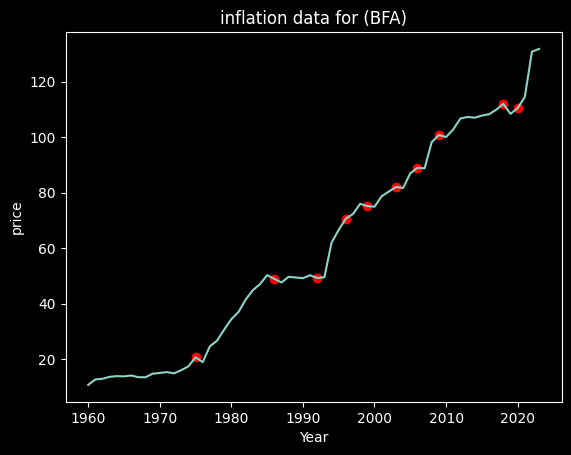

In [128]:
plt.plot(df.iloc[:100,2],df.iloc[:100,-1])
plt.scatter(df_data.iloc[index,2],df_data.iloc[index,-1],color='red')
plt.title(f'inflation data for ({country})')
plt.xlabel(f'Year')
plt.ylabel(f'price');